#### Library

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

<class 'numpy.uint8'>


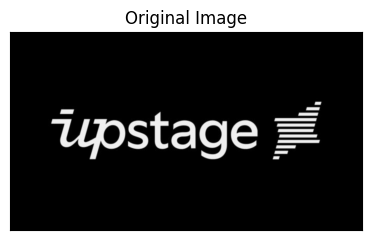

In [2]:
image = cv2.imread('../data/logo-font.jpg')  # 'logo-font.jpg' 이미지
image = ~cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # BGR을 Grayscale 이미지로 변환 후 0/1 값을 반전
print(type(image[0][0]))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')  # 흑백 색상 설정
plt.xticks([]), plt.yticks([])
plt.title('Original Image')  
plt.show() 

#### Erosion

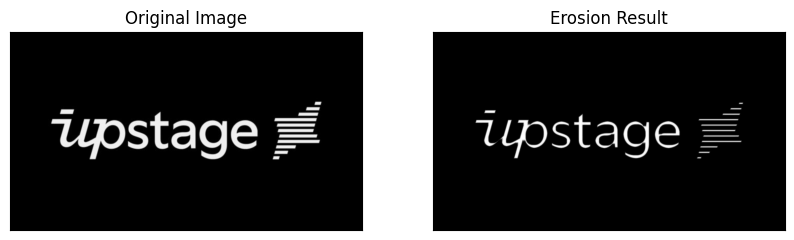

In [3]:
# Erosion 연산에 사용할 커널 정의
kernel = np.ones((5, 5), np.uint8)  # 5x5 크기의 모든 요소가 1인 커널 생성
erosion_result = cv2.erode(image, kernel, iterations=1)  # Erosion 연산

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')  # 원본 이미지
plt.title('Original Image')  
plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(erosion_result, cmap='gray')  # 침식 결과 이미지
plt.title('Erosion Result') 
plt.xticks([]), plt.yticks([])  
plt.show()  

#### Dilation 

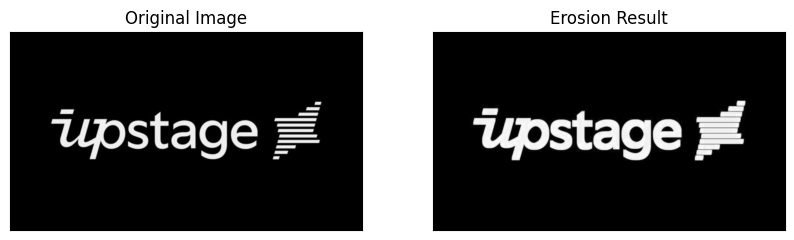

In [4]:
dilation_result = cv2.dilate(image, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')  # 원본 이미지
plt.title('Original Image')  
plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(dilation_result, cmap='gray')  # 침식 결과 이미지
plt.title('Erosion Result') 
plt.xticks([]), plt.yticks([])  
plt.show() 

#### Contour detection

<img src='https://github.com/BupyeongHealer/sample-image/blob/02f2bc7f5d895c0a4c3e132a34418af6e2a6ab03/contour-detection.PNG?raw=true'>

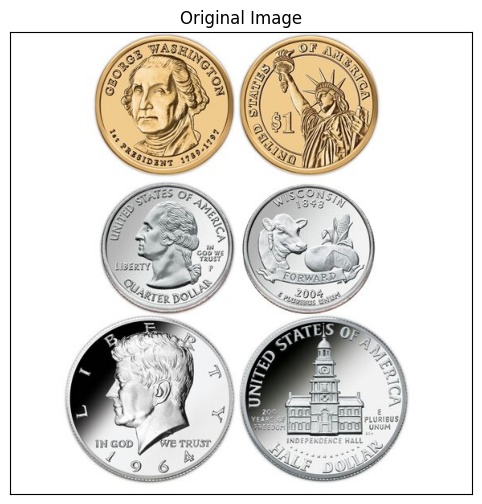

In [6]:
img = cv2.imread("../data/coin.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR > RGb 변환

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

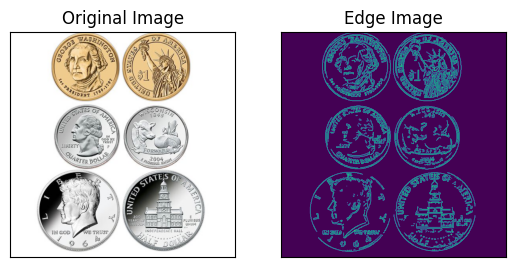

In [ ]:
edges = cv2.Canny(img, 350, 500) # threshold1, threshold2

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(edges)
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.show()

983


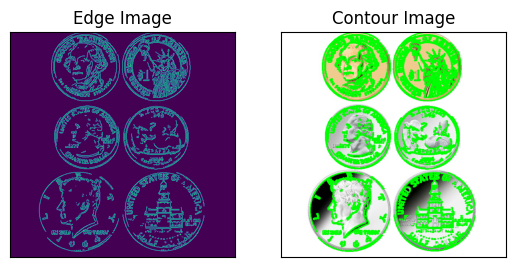

In [11]:
# contours 변수에 경계선을 찾아 저장 cv2.RETR_EXTERNAL로 외부 경계만 검출하며, cv2.CHAIN_APPROX_SIMPLE로 경계점을 간결하게 저장
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = img.copy()

# 초록색으로
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours))

plt.subplot(121)
plt.imshow(edges)
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(image_copy)
plt.title('Contour Image')
plt.xticks([]), plt.yticks([])
plt.show()

#### Dilation Kernel

7


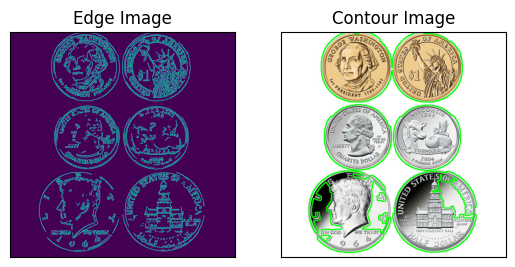

In [12]:
# Dilation 연산에 사용할 커널 정의
kernel = np.ones((3, 3), np.uint8)
dilate = cv2.dilate(edges, kernel, iterations=3) # Dilation 연산

# dilate 이미지에서 경계선을 찾아 contours 변수에 저장 cv2.RETR_EXTERNAL로 외부 경계만 검출하며, cv2.CHAIN_APPROX_SIMPLE로 경계점을 간결하게 저장
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = img.copy()

# 초록색 그림
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours))


plt.subplot(121)
plt.imshow(edges)
plt.title('Edge Image')  
plt.xticks([]), plt.yticks([])  

plt.subplot(122), plt.imshow(image_copy)
plt.title('Contour Image')  
plt.xticks([]), plt.yticks([])  

plt.show()  